In [1]:
import py21cmcast as p21c
import numpy as np 

from astropy import units

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

%load_ext autoreload
%autoreload 2

/home/users/g/f/gfacchin/exo21cmFAST_release/exo21cmFAST/src/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/users/g/f/gfacchin/exo21cmFAST_release/exo21cmFAST/src/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
z_bins, k_bins = p21c.define_grid_modes_redshifts(6., 8 * units.MHz, z_max = 22, k_min = 0.1 / units.Mpc, k_max = 1 / units.Mpc)
print("The redshift bin edges are:", z_bins)
print("The mode bin edges are:", k_bins)

fiducial_e_NO_MINIHALOS = p21c.Fiducial("../runs/CONSTRAINT_BKR", z_bins, k_bins, False, load=True)
fiducial_e_MINIHALOS = p21c.Fiducial("../runs/CONSTRAINT_BKR_MINIHALOS", z_bins, k_bins, False, load=True)

fiducial_e_NO_MINIHALOS.observation = 'HERA'
fiducial_e_MINIHALOS.observation = 'HERA'

The redshift bin edges are: [ 6.          6.28730456  6.5992025   6.93899281  7.31059216  7.71868653
  8.16892985  8.66820756  9.22499121  9.84982306 10.55599    11.36047883
 12.28536057 13.35984643 14.62342929 16.13084378 17.96020444 20.22698157]
The mode bin edges are: [0.1        0.15329426 0.20658851 0.25988277 0.31317703 0.36647129
 0.41976554 0.4730598  0.52635406 0.57964831 0.63294257 0.68623683
 0.73953109 0.79282534 0.8461196  0.89941386 0.95270811] 1 / Mpc


In [4]:
parameters_NO_MINIHALOS = ['F_STAR10', 'ALPHA_STAR', 'F_ESC10', 'ALPHA_ESC',  'M_TURN', 't_STAR', 'L_X', 'NU_X_THRESH']
parameters_MINIHALOS    = ['F_STAR10', 'F_STAR7_MINI', 'ALPHA_STAR', 'ALPHA_STAR_MINI',  't_STAR', 'F_ESC10', 'F_ESC7_MINI', 'ALPHA_ESC', 'L_X', 'L_X_MINI', 'NU_X_THRESH']

params_e_NO_MINIHALOS = [None] * len(parameters_NO_MINIHALOS)
params_e_MINIHALOS = [None] * len(parameters_MINIHALOS)

for iname, name in enumerate(parameters_NO_MINIHALOS) :  
    params_e_NO_MINIHALOS[iname] = p21c.Parameter(fiducial=fiducial_e_NO_MINIHALOS, name=name, verbose = False, plot = False, load=True)

print("----------")

for iname, name in enumerate(parameters_MINIHALOS) :  
    params_e_MINIHALOS[iname] = p21c.Parameter(fiducial=fiducial_e_MINIHALOS, name=name, verbose = False, plot = False, load=True)

Treating parameter F_STAR10
Treating parameter ALPHA_STAR
Treating parameter F_ESC10
Treating parameter ALPHA_ESC
Treating parameter M_TURN
Treating parameter t_STAR
Treating parameter L_X
Treating parameter NU_X_THRESH
----------
Treating parameter F_STAR10
Treating parameter F_STAR7_MINI
Treating parameter ALPHA_STAR
Treating parameter ALPHA_STAR_MINI
Treating parameter t_STAR
Treating parameter F_ESC10
Treating parameter F_ESC7_MINI
Treating parameter ALPHA_ESC
Treating parameter L_X
Treating parameter L_X_MINI
Treating parameter NU_X_THRESH


In [24]:
val_gamma_NO_MINIHALOS = [1e-36, 1e-35, 1e-34, 1e-33, 1e-32, 1e-31, 1e-30, 1e-29, 1e-28, 1e-27, 1e-26]
val_gamma_MINIHALOS    = [1e-35, 1e-34, 1e-33, 1e-32, 1e-31, 1e-30, 1e-29, 1e-28, 1e-27, 1e-26, 1e-25, 1e-24]

extra_params_e_m8_NO_MINIHALOS  = [None] * len(val_gamma_NO_MINIHALOS)
extra_params_e_m11_NO_MINIHALOS = [None] * len(val_gamma_NO_MINIHALOS)
extra_params_e_m8_MINIHALOS     = [None] * len(val_gamma_MINIHALOS)

for iname, val in enumerate(val_gamma_NO_MINIHALOS) :  
    extra_params_e_m8_NO_MINIHALOS[iname]  = p21c.Parameter(fiducial=fiducial_e_NO_MINIHALOS, name='DM_DECAY_RATE', verbose = False, plot=False, load=True, add_name = 'm8.0', values = val)
    extra_params_e_m11_NO_MINIHALOS[iname] = p21c.Parameter(fiducial=fiducial_e_NO_MINIHALOS, name='DM_DECAY_RATE', verbose = False, plot=False, load=True, add_name = 'm11.0', values = val)

for iname, val in enumerate(val_gamma_MINIHALOS) :  
    extra_params_e_m8_MINIHALOS[iname]  = p21c.Parameter(fiducial=fiducial_e_MINIHALOS, name='DM_DECAY_RATE', verbose = False, plot=False, load=True, add_name = 'm8.0', values = val)

2023-04-05 13:55:49,586 | WARNING | inputs.py::__init__() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!


Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m11.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m11.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m11.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m11.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m11.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m11.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m11.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m11.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m11.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m11.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m11.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_R

2023-04-05 13:56:09,430 | WARNING | inputs.py::__init__() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!


Treating parameter DM_DECAY_RATE (m8.0)
No existing data found for Lightcone_rs1993_DM_DECAY_RATE_m8.0_1.0000e-24.h5


In [25]:
fiducial_e_NO_MINIHALOS.frac_noise = 0.2
fiducial_e_MINIHALOS.frac_noise = 0.2

sigma_gamma_e_m8_NO_MINIHALOS  = np.zeros(len(val_gamma_NO_MINIHALOS))
sigma_gamma_e_m11_NO_MINIHALOS = np.zeros(len(val_gamma_NO_MINIHALOS))
sigma_gamma_e_m8_MINIHALOS     = np.zeros(len(val_gamma_MINIHALOS))

for iname, val in enumerate(val_gamma_NO_MINIHALOS) : 
    fisher_matrix     = p21c.evaluate_fisher_matrix([*params_e_NO_MINIHALOS, extra_params_e_m8_NO_MINIHALOS[iname]])
    covariance_matrix = np.linalg.inv(fisher_matrix['matrix'])
    sigma_gamma_e_m8_NO_MINIHALOS[iname] = np.sqrt(covariance_matrix[-1][-1])

for iname, val in enumerate(val_gamma_NO_MINIHALOS) : 
    fisher_matrix     = p21c.evaluate_fisher_matrix([*params_e_NO_MINIHALOS, extra_params_e_m11_NO_MINIHALOS[iname]])
    covariance_matrix = np.linalg.inv(fisher_matrix['matrix'])
    sigma_gamma_e_m11_NO_MINIHALOS[iname] = np.sqrt(covariance_matrix[-1][-1])

for iname, val in enumerate(val_gamma_MINIHALOS) : 
    fisher_matrix     = p21c.evaluate_fisher_matrix([*params_e_MINIHALOS, extra_params_e_m8_MINIHALOS[iname]])
    covariance_matrix = np.linalg.inv(fisher_matrix['matrix'])
    sigma_gamma_e_m8_MINIHALOS[iname] = np.sqrt(covariance_matrix[-1][-1])

print('----------')
print(sigma_gamma_e_m8_NO_MINIHALOS)
print(sigma_gamma_e_m11_NO_MINIHALOS)
print(sigma_gamma_e_m8_MINIHALOS)

----------
[2.80640630e-30 1.10762905e-29 1.61055952e-29 1.49131865e-29
 1.44987361e-29 1.52598179e-29 1.52501032e-29 1.63392431e-29
 2.37795586e-29 4.52605570e-29 2.82398032e-28]
[9.84784089e-30 6.26412775e-29 6.13156459e-28 1.42776099e-27
 1.82021471e-27 2.15070356e-27 2.04028315e-27 2.12674889e-27
 2.15225952e-27 2.26270576e-27 3.20370358e-27]
[9.62191405e-33 9.62123358e-32 9.67493277e-31 9.84869073e-30
 7.76548537e-29 2.43940456e-28 2.74428499e-28 3.64377262e-28
 2.74510848e-28 1.18906638e-27 1.12124115e-26 6.07459467e-25]


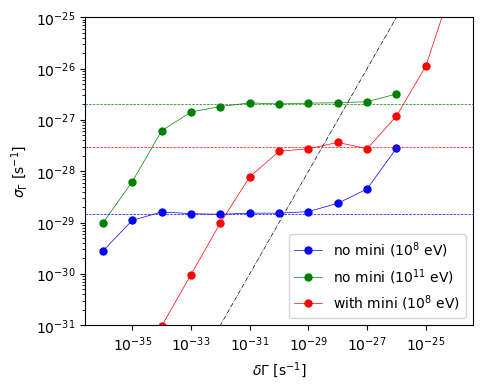

In [30]:
%matplotlib inline

fig, ax = p21c.prepare_plot(ylog=True, xlog=True, xlabel=r'$\delta \Gamma ~ [{\rm s^{-1}}]$', ylabel=r'$\sigma_\Gamma ~ [{\rm s^{-1}}]$')
ax.plot(val_gamma_NO_MINIHALOS, sigma_gamma_e_m8_NO_MINIHALOS, marker='o', linestyle = '-', color='b', linewidth=0.5, markersize=5, label=r'${\rm no~mini}~(10^8~{\rm eV})$')
ax.plot(val_gamma_NO_MINIHALOS, sigma_gamma_e_m11_NO_MINIHALOS, marker='o', linestyle = '-', color='g', linewidth=0.5, markersize=5,label=r'${\rm no~mini}~(10^{11}~{\rm eV})$')
ax.plot(val_gamma_MINIHALOS, sigma_gamma_e_m8_MINIHALOS, marker='o', linestyle = '-', color='r', linewidth=0.5, markersize=5, label=r'${\rm with~mini}~(10^8~{\rm eV})$')
ax.plot(val_gamma_NO_MINIHALOS, 10*np.array(val_gamma_NO_MINIHALOS), 'k-.', linewidth=0.5)
#ax.plot(val_gamma_NO_MINIHALOS, 100*np.array(val_gamma_NO_MINIHALOS), 'k-.', linewidth=0.5)
#ax.fill_between(val_gamma_NO_MINIHALOS, 10*np.array(val_gamma_NO_MINIHALOS), 100*np.array(val_gamma_NO_MINIHALOS), color='k', alpha=0.1)

ax.axhline(y=1.5e-29, color='b', linestyle='--', linewidth=0.5)
ax.axhline(y=3e-28, color='r', linestyle='--', linewidth=0.5)
ax.axhline(y=2.e-27, color='g', linestyle='--', linewidth=0.5)
ax.set_ylim([1e-31, 1e-25])

ax.legend()


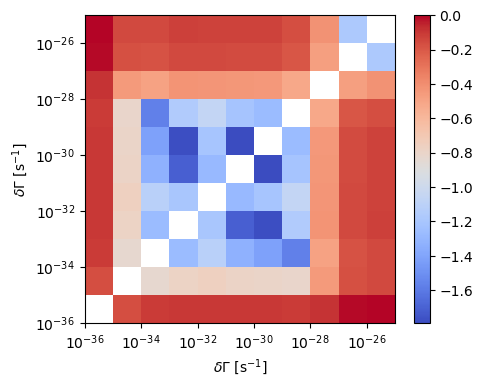

In [13]:
fig, ax = p21c.prepare_plot(ylog=True, xlog=True, xlabel=r'$\delta \Gamma ~ [{\rm s^{-1}}]$', ylabel=r'$\delta \Gamma ~ [{\rm s^{-1}}]$')

def L2_norm(array_1, array_2):
    return np.sqrt(np.sum((array_1 - array_2)**2))

dist_matrix = np.zeros(shape=(len(val_gamma), len(val_gamma)))

for i, ival in enumerate(val_gamma) :  
    for j, jval in enumerate(val_gamma) :
        dist_matrix[i][j] = L2_norm(extra_params[i].weighted_ps_derivative(), extra_params[j].weighted_ps_derivative()) 

    dist_matrix[i][i] = np.nan


c = ax.pcolormesh([*val_gamma, 1e-25], [*val_gamma, 1e-25],  np.log10(dist_matrix/np.nanmax(dist_matrix)), cmap='coolwarm')
fig.colorbar(c, ax = ax)

In [62]:
l10_mass_str_arr = ['2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0', '5.5', '6.0', '6.5', '7.0', '7.5', '8.0', '8.5', '9.0', '9.5', '10.0', '10.5', '11.0', '11.5', '12.0']
l10_mass_arr = [np.float(l10_mass_str) for l10_mass_str in  l10_mass_str_arr]
gamma_array  = [1e-36, 1e-35, 1e-34, 1e-33, 1e-32, 1e-31, 1e-30, 1e-29, 1e-28, 1e-27, 1e-26, 1e-25, 1e-24, 1e-23]

for im, l10_mass in enumerate(l10_mass_arr):
    primary = 'phot_delta' if l10_mass <= np.log10(5e+9) else 'gamma'
    p21c.make_config_one_varying_param("../config/constraint_bkr.config", 'DM_DECAY_RATE', gamma_array , mod_astro_params = {'DM_LOG10_MASS' : l10_mass},  mod_flag_options = {'DM_PRIMARY' : primary}, add_file_name= 'm' + l10_mass_str_arr[im])

 py21cmcast/3035987679.py:2: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations (DeprecationWarning)
